In [6]:
# 稍微简化的AlexNet
import d2lzh as d2l
from mxnet import gluon, init, nd
from mxnet.gluon import data as gdata, nn
import os
import sys
import matplotlib
%matplotlib inline

net = nn.Sequential()
net.add(nn.Conv2D(32, kernel_size=11, strides=4, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Conv2D(64, kernel_size=5, padding=2, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Conv2D(128, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(128, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(64, kernel_size=3, padding=1, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Dense(1600, activation='relu'), nn.Dropout(0.5),
        nn.Dense(1600, activation='relu'), nn.Dropout(0.5),
        nn.Dense(10))

In [7]:
X = nd.random.uniform(shape=(1, 1,224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv10 output shape:	 (1, 32, 54, 54)
pool6 output shape:	 (1, 32, 26, 26)
conv11 output shape:	 (1, 64, 26, 26)
pool7 output shape:	 (1, 64, 12, 12)
conv12 output shape:	 (1, 128, 12, 12)
conv13 output shape:	 (1, 128, 12, 12)
conv14 output shape:	 (1, 64, 12, 12)
pool8 output shape:	 (1, 64, 5, 5)
dense6 output shape:	 (1, 1600)
dropout4 output shape:	 (1, 1600)
dense7 output shape:	 (1, 1600)
dropout5 output shape:	 (1, 1600)
dense8 output shape:	 (1, 10)


In [8]:
def load_data_fashion_mnist(batch_size, resize=None, root=os.path.join('~', '.mxnet', 'dataset', 'fashion-mnist')):
    root = os.path.expanduser(root)
    transformer = []
    if resize:
        transformer += [gdata.vision.transforms.Resize(resize)]
    transformer += [gdata.vision.transforms.ToTensor()]
    transformer = gdata.vision.transforms.Compose(transformer)
    mnist_train = gdata.vision.FashionMNIST(root=root, train=True)
    mnist_test = gdata.vision.FashionMNIST(root=root, train=False)
    num_workers = 0 if sys.platform.startswith('win32') else 4
    train_iter = gdata.DataLoader(
        mnist_train.transform_first(transformer), batch_size, shuffle=True, num_workers=num_workers
    )
    test_iter = gdata.DataLoader(
        mnist_test.transform_first(transformer), batch_size, shuffle=True, num_workers=num_workers
    )
    return train_iter, test_iter

batch_size = 128
train_iter, test_iter =load_data_fashion_mnist(batch_size, resize=224)

In [9]:
lr, num_epochs, ctx = 0.01, 5, d2l.try_gpu()
net.initialize(force_reinit=True, ctx=ctx, init=init.Xavier())
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
d2l.train_ch5(net, train_iter, test_iter, batch_size, trainer, ctx, num_epochs)

training on gpu(0)
epoch 1, loss 1.4702, train acc 0.454, test acc 0.747, time 46.5 sec
epoch 2, loss 0.7099, train acc 0.735, test acc 0.796, time 42.0 sec
epoch 3, loss 0.5810, train acc 0.783, test acc 0.827, time 40.9 sec
epoch 4, loss 0.5115, train acc 0.811, test acc 0.849, time 41.1 sec
epoch 5, loss 0.4644, train acc 0.830, test acc 0.862, time 41.0 sec


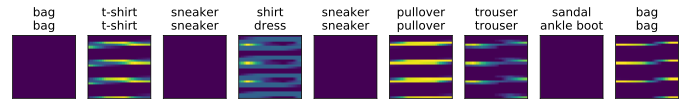

In [14]:
for X,y in test_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X.as_in_context(ctx)).argmax(axis=1).asnumpy())

titles = [true + '\n' + pred for true ,pred in zip(true_labels, pred_labels)]
d2l.show_fashion_mnist(X[0:9], titles[0:9])
